<div class="alert alert-info">
    <br>
    <h1>Business Case 2</h1>
    <h2>Market Basket Analysis</h2>
    <h4>A2M Consulting</h4>
    <br>
    <p>Ana Beatriz Afonso (R2016767)</p>
    <p>André Queda (R2016658)</p>
    <p>Manuel Viegas (R2016674)</p>
    <p>Miguel Cordeiro (R2016702)</p>
    <br>
</div>





## Methodology
* Data Preparation
	* Missing Values
	* Data Cleaning
	* Outliers
		* Check boxplots
		* Remove outliers
	* Coherence Verifications
	* Variable Creation
		* Add Additional Variables
		* Sums and Ratios
		* Binary Variables
		* Create Dummy
* Data Exploration
* Feature Selection
	* Remove Variables
	* Correlation
	* Recursive Feature Elmination (RFE)
	* Lasso Regression
	* Ridge Regression
	* Select Final Features
* Predictive Models
	* Logistic Regression
	* Neural Networks
	* Compare Models


<br>
<br>
<div class="alert alert-info">
    <br>
    <h2>0. Import Packages and Dataset</h2>
    <p>Import the necessary packages and libraries for project development.

</p>
    <br>
</div>

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [372]:
df = pd.read_csv('H2.csv')
#df.info()

In [373]:
# Summary Statistics

summary=df.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IsCanceled,79330,NaN,NaN,NaN,0.41727,0.493111,0,0,0,1,1
LeadTime,79330,NaN,NaN,NaN,109.736,110.949,0,23,74,163,629
ArrivalDateYear,79330,NaN,NaN,NaN,2016.17,0.699181,2015,2016,2016,2017,2017
ArrivalDateMonth,79330,12,August,8983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArrivalDateWeekNumber,79330,NaN,NaN,NaN,27.1774,13.3985,1,17,27,38,53
ArrivalDateDayOfMonth,79330,NaN,NaN,NaN,15.7866,8.72845,1,8,16,23,31
StaysInWeekendNights,79330,NaN,NaN,NaN,0.795185,0.885026,0,0,1,2,16
StaysInWeekNights,79330,NaN,NaN,NaN,2.18296,1.45642,0,1,2,3,41
Adults,79330,NaN,NaN,NaN,1.85098,0.509292,0,2,2,2,4
Children,79326,NaN,NaN,NaN,0.0913698,0.372177,0,0,0,0,3


<br>
<br>
<div class="alert alert-info">
    <br>
    <h2>1. Data Preparation</h2>
    <p>Before performing any analysis, it is necessary to prepare the data, namely transforming and cleaning it. This process will ensure the necessary data quality to produce free-from-errors, unbiased and reality-accurate analysis and models.</p>
    <br>
</div>


<div class="alert alert-success">
    <h3>1.1 - Missing Values</h3>

</div> 

In [374]:
df.isnull().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

28 missing values only corresponds to 0.04% of the population. Given that this value is very low, it was decided to **drop the missing values**.

In [375]:
df = df.dropna()

<div class="alert alert-success">
    <h3> 1.2 - Clean Text Variables (Strings)</h3>
    <p>The motive of this step is to check whether or not the text variables are ready for analysis purposes.
    
</div>

In [376]:
df.select_dtypes(object).columns

Index(['ArrivalDateMonth', 'Meal', 'Country', 'MarketSegment',
       'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType',
       'DepositType', 'Agent', 'Company', 'CustomerType', 'ReservationStatus',
       'ReservationStatusDate'],
      dtype='object')

In [377]:
# Substitue column with the one wanted for analysis, from the above list
df['Meal'].unique()

array(['HB       ', 'BB       ', 'SC       ', 'FB       '], dtype=object)

After checking all variables, it is possible to see that the following need to be cleaned:
* Meal
* ReservedRoomType
* AssignedRoomType
* DepositType
* Agent
* Company

In [378]:
clean = ['Meal', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'Agent', 'Company']

for c in clean:
    df[c] = df[c].str.strip()

<div class="alert alert-success">
    <h3> 1.3 - Outliers</h3>

    
</div>

Need to check for outliers in...
* 'IsCanceled': No
* 'LeadTime': Yes
* 'ArrivalDateYear': No
* 'ArrivalDateMonth': No
* 'ArrivalDateWeekNumber': No
* 'ArrivalDateDayOfMonth': No
* 'StaysInWeekendNights': Yes
* 'StaysInWeekNights': Yes
* 'Adults': No
* 'Children': Yes
* 'Babies': Yes
* 'Meal': No
* 'Country': No
* 'MarketSegment': No
* 'DistributionChannel': No
* 'IsRepeatedGuest': No
* 'PreviousCancellations': Yes
* 'ReservedRoomType': No
* 'AssignedRoomType': No
* 'BookingChanges': Yes
* 'DepositType': No
* 'Agent': No
* 'Company': No
* 'DaysInWaitingList': Yes
* 'CustomerType': No
* 'ADR': Yes
* 'RequiredCarParkingSpaces': Yes
* 'TotalOfSpecialRequests': Yes
* 'ReservationStatus': No
* 'ReservationStatusDate': No


<div class="alert alert-success">
    <h4> 1.3.1 - Check Boxplots</h4>

    
</div>

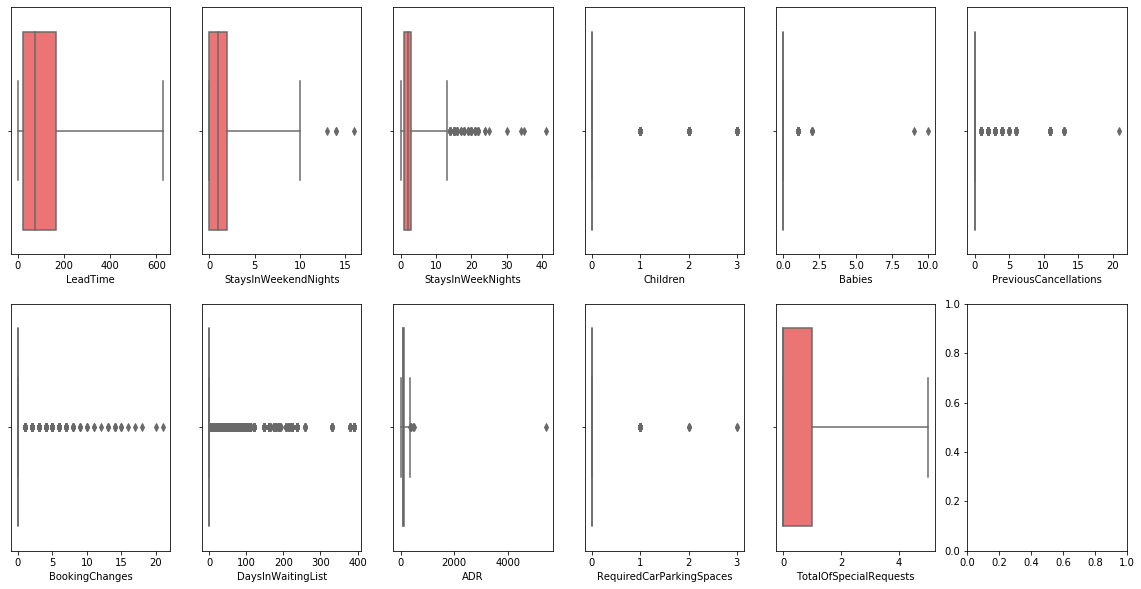

In [379]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(20,10))
ax = sns.boxplot(df['LeadTime'], orient='h', whis=5, ax=axes[0,0], color='#ff6060')
ax = sns.boxplot(df['StaysInWeekendNights'], orient='h', whis=5, ax=axes[0,1], color='#ff6060')
ax = sns.boxplot(df['StaysInWeekNights'], orient='h', whis=5, ax=axes[0,2], color='#ff6060')
ax = sns.boxplot(df['Children'], orient='h', whis=5, ax=axes[0,3], color='#ff6060')
ax = sns.boxplot(df['Babies'], orient='h', whis=5, ax=axes[0,4], color='#ff6060')
ax = sns.boxplot(df['PreviousCancellations'], orient='h', whis=5, ax=axes[0,5], color='#ff6060')
ax = sns.boxplot(df['BookingChanges'], orient='h', whis=5, ax=axes[1,0], color='#ff6060')
ax = sns.boxplot(df['DaysInWaitingList'], orient='h', whis=5, ax=axes[1,1], color='#ff6060')
ax = sns.boxplot(df['ADR'], orient='h', whis=5, ax=axes[1,2], color='#ff6060')
ax = sns.boxplot(df['RequiredCarParkingSpaces'], orient='h', whis=5, ax=axes[1,3], color='#ff6060')
ax = sns.boxplot(df['TotalOfSpecialRequests'], orient='h', whis=5, ax=axes[1,4], color='#ff6060')

After checking the boxplots, it was decided to remove outliers in the following variables:
* **StaysInWeekendNights** - Remove observations with more than 10 week nights spent in the hotel.
* **StaysInWeekendNights** - Remove observations with more than 40 weekend nights spent in the hotel.
* **Babies** - Remove observations with more than 7 Babies.
* **Previous Cancellations** - Remove observations where there are more than 10 Previous Cancellations.
* **DaysInWaitingList** - Remove observations with more than 300 Days in the Waiting List.
* **ADR** - Remove observations where the Average Daily Rate is higher than 4000.



<div class="alert alert-success">
    <h4> 1.3.2 - Remove Outliers</h4>

    
</div>


In [2]:
df_clean = df.loc[df['StaysInWeekendNights']<10]
df_clean = df_clean.loc[df_clean['StaysInWeekNights']<40]
df_clean = df_clean.loc[df_clean['Babies']<7]
df_clean = df_clean.loc[df_clean['PreviousCancellations']<10]
df_clean = df_clean.loc[df_clean['DaysInWaitingList']<300]
df_clean = df_clean.loc[df_clean['ADR']<4000]

fig1, axes = plt.subplots(nrows=2, ncols=6, figsize=(20,10))
ax = sns.boxplot(df_clean['LeadTime'], orient='h', whis=5, ax=axes[0,0], color='#ff6060')
ax = sns.boxplot(df_clean['StaysInWeekendNights'], orient='h', whis=5, ax=axes[0,1], color='#ff6060')
ax = sns.boxplot(df_clean['StaysInWeekNights'], orient='h', whis=5, ax=axes[0,2], color='#ff6060')
ax = sns.boxplot(df_clean['Children'], orient='h', whis=5, ax=axes[0,3], color='#ff6060')
ax = sns.boxplot(df_clean['Babies'], orient='h', whis=5, ax=axes[0,4], color='#ff6060')
ax = sns.boxplot(df_clean['PreviousCancellations'], orient='h', whis=5, ax=axes[0,5], color='#ff6060')
ax = sns.boxplot(df_clean['BookingChanges'], orient='h', whis=5, ax=axes[1,0], color='#ff6060')
ax = sns.boxplot(df_clean['DaysInWaitingList'], orient='h', whis=5, ax=axes[1,1], color='#ff6060')
ax = sns.boxplot(df_clean['ADR'], orient='h', whis=5, ax=axes[1,2], color='#ff6060')
ax = sns.boxplot(df_clean['RequiredCarParkingSpaces'], orient='h', whis=5, ax=axes[1,3], color='#ff6060')
ax = sns.boxplot(df_clean['TotalOfSpecialRequests'], orient='h', whis=5, ax=axes[1,4], color='#ff6060')

NameError: name 'df' is not defined

In [381]:
print('Number of Outliers:', len(df)-len(df_clean))

Number of Outliers: 132


<div class="alert alert-success">
    <h3> 1.4 - Lost Observations</h3>
  <p>Removing missing values and outliers (160 observations) results in a loss of 0.2% of the observations. This is a very acceptable value.
    
</div>

<div class="alert alert-success">
    <h3>1.5 - Coherence Check</h3>
    <p>If IsCanceled=0, then ReservationStatus must be Check-Out. If IsCanceled=1, ReservationStatus can be Canceled or No-Show.
</div>

In [382]:
df['ReservationStatus'].loc[df['IsCanceled']==0].value_counts()

Check-Out    46226
Name: ReservationStatus, dtype: int64

In [383]:
df['ReservationStatus'].loc[df['IsCanceled']==1].value_counts()

Canceled    32160
No-Show       916
Name: ReservationStatus, dtype: int64

It is possible to conclude that there are no incoherent values, regarding this condition.

<div class="alert alert-success">
    <h3>1.6 - Create New Variables</h3>
 
</div>

In [385]:
df = df_clean


<div class="alert alert-success">
    <h3>1.6.1 - Add Additional Variables</h3>
    <p>Creation of the variable IsHoliday, to analyse demand during these special days. This variable includes every Portugueses national holiday, and other ocasions like Father's Day, Mother's Day and Valentine's Day, and Lisbon's holiday (St. Anthony's Day), given that the hotel is located there.
</div>

In [386]:
df['ArrivalDate'] = df['ArrivalDateYear'].map(str)+ '-' +df['ArrivalDateMonth']+ '-' +df['ArrivalDateDayOfMonth'].map(str)

In [387]:
holidays = ['2015-January-1', '2015-February-14', '2015-February-17', '2015-March-19', '2015-April-3', '2015-April-5',
            '2015-April-25', '2015-May-1', '2015-May-3', '2015-June-10', '2015-June-13', '2015-August-15', '2015-December-8',
            '2015-December-24', '2015-December-25', '2015-December-31',
            '2016-January-1', '2016-February-9', '2016-February-14', '2016-March-19', '2016-March-25', '2016-March-27',
            '2016-April-25', '2016-May-1', '2016-May-26', '2016-June-10', '2016-June-13', '2016-August-15', '2016-October-5',
            '2016-November-1', '2016-December-1', '2016-December-8', '2016-December-24', '2016-December-25',
            '2016-December-31',
            '2017-January-1', '2017-February-14', '2017-February-28', '2017-March-19', '2017-April-14', '2017-April-16',
            '2017-April-25', '2017-May-1', '2017-May-7', '2017-May-12', '2017-June-10', '2017-June-13', '2017-June-15',
            '2017-August-15', '2017-October-5', '2017-November-1', '2017-December-1', '2017-December-8','2017-December-24',
            '2017-December-25', '2017-December-31']

df['IsHoliday'] = 0
for h in holidays:
    df.loc[df['ArrivalDate'] == h, 'IsHoliday'] = 1

In [388]:
df['IsCanceled'].loc[df['IsHoliday']==0].value_counts()

0    44074
1    31358
Name: IsCanceled, dtype: int64



<div class="alert alert-success">
    <h4>1.6.2 - Sums and Ratios</h4>
</div>
<div class="alert alert-success">
    <h5>1.6.2.1 - TotalNights</h5>
</div>

In [389]:
df['TotalNights'] = df['StaysInWeekendNights'] + df['StaysInWeekNights']

In [390]:
X = df.copy()
X['Total'] = X['TotalNights']*X['ADR']
X['Total'].sum()

25245117.93


<div class="alert alert-success">
    <h5>1.6.2.2 - Ratio of Week Nights</h5>
</div>

In [391]:
df['WeekNights%'] = df['StaysInWeekNights'] / df['TotalNights']

df['WeekNights%'].isna().sum()

324

324 people have TotalNights = 0. Since they only represent around 0.4% of the data, these values are going to be dropped.

In [392]:
df = df.dropna()
df['WeekNights%'].isna().sum()

0


<div class="alert alert-success">
    <h5>1.6.2.3 - PreviousBookings</h5>
</div>

In [393]:
df['PreviousBookings'] = df['PreviousCancellations'] + df['PreviousBookingsNotCanceled']


<div class="alert alert-success">
    <h5>1.6.2.4 - Ratio of  Previous Cancellations</h5>
</div>

In [394]:
df['PreviousCancellations%'] = df['PreviousCancellations'] / df['PreviousBookings']

df['PreviousCancellations%'].isna().sum()

72364

72 364 customers do not have any previous bookings, so they're previous cancellation percentage is going to be null. It was decided that these records would be filled with 0.

In [395]:
df['PreviousCancellations%'] = df['PreviousCancellations%'].fillna(0)


<div class="alert alert-success">
    <h5>1.6.2.5 - Kids and TotalGuests</h5>
</div>

In [396]:
df['Adults'].value_counts()

2    57952
1    15778
3     4766
0      319
4       31
Name: Adults, dtype: int64

In [397]:
df['Children'].value_counts()

0.0    73751
1.0     3015
2.0     2021
3.0       59
Name: Children, dtype: int64

In [398]:
df['Babies'].value_counts()

0    78482
1      358
2        6
Name: Babies, dtype: int64

In [399]:
# Children and Babies are definitely worth joining and later transform to binary

df['Kids'] = df['Children'] + df['Babies']

In [400]:
#Total Guests aggregates the different guest categories

df['TotalGuests'] = df['Adults'] + df['Children'] + df['Babies']


<div class="alert alert-success">
    <h4>1.6.3 - Binary Variables</h4>
</div>

In [401]:
def transformBinary(c_old, c_new):
    zero = [0]
    for z in zero:
        df.loc[df[c_old] != z, c_new] = 1

<div class="alert alert-success">
    <h5>1.6.3.1 - Kids</h5>
</div>

In [402]:
df['Kids'].value_counts()

0.0    73459
1.0     3252
2.0     2053
3.0       82
Name: Kids, dtype: int64

It was concluded that is not relevant to see how many kids are in a booking. Just knowing if there is any, is enough.

In [403]:
transformBinary('Kids','Kids')

<div class="alert alert-success">
    <h5>1.6.3.2 - TotalParkingSpaces</h5>
</div>

In [404]:
df['RequiredCarParkingSpaces'].value_counts()

0    76926
1     1915
2        3
3        2
Name: RequiredCarParkingSpaces, dtype: int64

Since only 5 people asked for more than 1 parking space, a binary indicating if the parking was asked is more useful.

In [405]:
df['RequiredParking'] = 0
transformBinary('RequiredCarParkingSpaces', 'RequiredParking')

<div class="alert alert-success">
    <h5>1.6.3.3 - TotalOfSpecialRequests</h5>
</div>


In [406]:
df['TotalOfSpecialRequests'].value_counts()

0    47633
1    21295
2     8112
3     1582
4      198
5       26
Name: TotalOfSpecialRequests, dtype: int64

In [407]:
df['SpecialRequests'] = 0
transformBinary('TotalOfSpecialRequests', 'SpecialRequests')

<div class="alert alert-success">
    <h5>1.6.3.4 - BookingChanges</h5>
</div>


In [408]:
df['BookingChanges'].value_counts()

0     68661
1      7165
2      2234
3       467
4       194
5        45
6        30
7        18
8         9
9         4
14        4
10        3
13        3
15        3
11        2
18        1
16        1
17        1
20        1
Name: BookingChanges, dtype: int64

Only 4% of customers change their Booking more than once, so a binary variable indicating if there was any changes is easier to understand.

In [409]:
df['BkChanges'] = 0
transformBinary('BookingChanges', 'BkChanges')

<div class="alert alert-success">
    <h5>1.6.3.5 - Deposit_Type</h5>
</div>


In [410]:
df['DepositType'].value_counts()

No Deposit    66018
Non Refund    12808
Refundable       20
Name: DepositType, dtype: int64

Only 20 customers have made refundable deposits. If a customer cancels their reservation, they are not going to lose money if they have not made a deposit or if they have made a refundable one. For that reason, these two are going to be joined.

In [411]:
deposit = ['No Deposit', 'Refundable']

df['Deposit'] = 1

for d in deposit:
    df.loc[df['DepositType'] == d, 'Deposit'] = 0

<div class="alert alert-success">
    <h5>1.6.3.6 - Company</h5>
</div>


In [412]:
df['Company'].value_counts()

NULL    75195
40        918
67        267
45        243
153       209
219       139
233       114
174       113
51         86
242        61
348        59
38         51
280        48
91         47
197        47
68         46
218        42
202        38
169        38
148        33
238        33
62         32
385        30
365        28
221        27
72         27
46         26
418        25
227        24
179        24
        ...  
489         1
255         1
445         1
273         1
317         1
65          1
84          1
160         1
278         1
96          1
491         1
330         1
234         1
258         1
379         1
130         1
253         1
257         1
313         1
288         1
395         1
301         1
100         1
305         1
264         1
356         1
308         1
309         1
132         1
349         1
Name: Company, Length: 207, dtype: int64

Since the majority of clients is not associated with any company, this variable is going to be divided in two categories, indicating if the booking is associated with a company or not. 

In [413]:
df['IsCompany'] = 0

company = ['NULL']
        
for c in company:
    df.loc[df['Company'] != c, 'IsCompany'] = 1

<div class="alert alert-success">
    <h5>1.6.3.7 - Distribution Channel</h5>
</div>


In [414]:
df['DistributionChannel'].value_counts()

TA/TO        68584
Direct        6698
Corporate     3374
GDS            190
Name: DistributionChannel, dtype: int64

Direct, Corporate and GDS only represent 13% of the population. The solution here is to create the binary variable 'IsTA/TO'.

In [415]:
channel = ['Direct', 'Corporate', 'GDS']

df['IsTA/TO'] = 1
        
for c in channel:
    df.loc[df['DistributionChannel'] == c, 'IsTA/TO'] = 0


<div class="alert alert-success">
    <h4>2.6.4 - Create Dummies</h4>
</div>

In [416]:
# Before starting this process, these 4 variables were created for exploratory purposes and will later be dropped

df['ArrivalDateMonth_cat'] = df['ArrivalDateMonth']
df['CustomerType_cat'] = df['CustomerType']
df['MarketSegment_cat'] = df['MarketSegment']
df['ReservedRoomType_cat'] = df['ReservedRoomType']

Function to return categories of columns based on threshold of distribution of the category

In [417]:
def one_hot(s, threshold,prefix):
    d = pd.get_dummies(s)
    f = pd.value_counts(s, sort=False, normalize=True) < threshold
    if f.sum() == 0:
        newSeries=d
    else:
        newSeries=d.loc[:, ~f].join(d.loc[:, f].sum(1).rename('Other'))
    newSeries=newSeries.add_prefix(prefix)
    return newSeries


<div class="alert alert-success">
    <h5>1.6.4.1 - ReservedRoomType</h5>
</div>



In [418]:
df['ReservedRoomType'].value_counts()

A    62195
D    11722
F     1786
E     1543
B     1106
G      481
C       13
Name: ReservedRoomType, dtype: int64

It was decided to only keep A, D and assign the rest to the Others category.

In [419]:
colToProcess = df['ReservedRoomType'].astype(str)
procDF = one_hot(colToProcess, .10, 'ReservedRoomType'+'_')
df.drop(columns='ReservedRoomType', inplace=True)
df = pd.concat([df, procDF], axis=1)

<div class="alert alert-success">
    <h5>1.6.4.2 - MarketSegment</h5>
</div>

In [420]:
df['MarketSegment'].value_counts()

Online TA        38581
Offline TA/TO    16645
Groups           13875
Direct            6029
Corporate         2966
Complementary      519
Aviation           231
Name: MarketSegment, dtype: int64

Regarding MarketSegment, the decision was to maintain Online TA, Offline TA/TO, Groups, Direct and the rest would be categorised as Others.

In [421]:
colToProcess = df['MarketSegment'].astype(str)
procDF = one_hot(colToProcess, .05, 'MarketSegment'+'_')
df.drop(columns='MarketSegment', inplace=True)
df = pd.concat([df, procDF], axis=1)


<div class="alert alert-success">
    <h5>1.6.4.3 - Agent</h5>
</div>

In [422]:
df['Agent'].value_counts()

9       31836
NULL     8011
1        7059
14       3625
7        3520
6        2654
28       1640
3        1304
37       1228
8        1227
19       1060
21        875
229       785
83        693
29        679
12        563
85        550
20        540
30        484
27        447
22        380
56        375
86        336
58        335
119       304
26        295
34        293
44        291
11        289
138       286
        ...  
283         1
213         1
480         1
93          1
265         1
54          1
267         1
294         1
278         1
158         1
346         1
427         1
280         1
250         1
464         1
397         1
70          1
197         1
289         1
242         1
476         1
270         1
73          1
331         1
247         1
216         1
306         1
444         1
256         1
416         1
Name: Agent, Length: 224, dtype: int64

Similarly to the above variables, only NULL and agent 9 were saved. The rest was assigned to Others.

In [423]:
colToProcess = df['Agent'].astype(str)
procDF = one_hot(colToProcess, .10, 'Agent'+'_')
df.drop(columns='Agent', inplace=True)
df = pd.concat([df, procDF], axis=1)

<div class="alert alert-success">
    <h5>1.6.4.4 - Meal, CustomerType & ArrivalDateMonth</h5>
</div>

In [424]:
df['Meal'].value_counts()

BB    61952
SC    10477
HB     6373
FB       44
Name: Meal, dtype: int64

The meal categories HB and FB will be joined, because together they represent about 8% of the population and FB alone only represents, approximately 0.06%.

In [425]:
df['CustomerType'].value_counts()

Transient          59015
Transient-Party    17248
Contract            2292
Group                291
Name: CustomerType, dtype: int64

In [426]:
df['ArrivalDateMonth'].value_counts()

August       8962
May          8192
July         8067
June         7879
October      7503
April        7445
September    7354
March        6419
February     4921
November     4316
December     4098
January      3690
Name: ArrivalDateMonth, dtype: int64

In [427]:
# Encode categorical variables to dummy variables

cols = ['Meal', 'CustomerType', 'ArrivalDateMonth']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
df = ce_one_hot.fit_transform(df)

In [428]:
df['Meal_HBFB'] = df['Meal_HB'] + df['Meal_FB']
df.drop(['Meal_HB','Meal_FB'], axis=1, inplace=True)

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78846 entries, 0 to 79329
Data columns (total 73 columns):
IsCanceled                      78846 non-null int64
LeadTime                        78846 non-null int64
ArrivalDateYear                 78846 non-null int64
ArrivalDateMonth_July           78846 non-null int64
ArrivalDateMonth_August         78846 non-null int64
ArrivalDateMonth_September      78846 non-null int64
ArrivalDateMonth_October        78846 non-null int64
ArrivalDateMonth_November       78846 non-null int64
ArrivalDateMonth_December       78846 non-null int64
ArrivalDateMonth_January        78846 non-null int64
ArrivalDateMonth_February       78846 non-null int64
ArrivalDateMonth_March          78846 non-null int64
ArrivalDateMonth_April          78846 non-null int64
ArrivalDateMonth_May            78846 non-null int64
ArrivalDateMonth_June           78846 non-null int64
ArrivalDateWeekNumber           78846 non-null int64
ArrivalDateDayOfMonth           78846 non-n

<br>
<br>
<div class="alert alert-info">
    <br>
    <h2>2 - Exploratory Data Analysis</h2>
    <br>
</div>


<div class="alert alert-success">
    <h3>2.1 - Business Understanding KPIs</h3>

</div> 

In [ ]:
df_marketsegmentcount = df_clean.groupby('MarketSegment')['MarketSegment'].count()

print("Bookings from OTAs relative to total bookings: " + str(round(df_marketsegmentcount.loc[df_marketsegmentcount.index=='Online TA'].values[0]/len(df_clean)*100,2)) + "%")

bookingsrevenue = df_clean.loc[df_clean['ReservationStatus']=="Check-Out"]
bookingsrevenue = bookingsrevenue[['ADR', 'TotalNights', 'MarketSegment']]
bookingsrevenue['multi'] = bookingsrevenue['ADR'] * bookingsrevenue['TotalNights']

roomRevenueOTAvsTotal = round(bookingsrevenue.loc[bookingsrevenue['MarketSegment']=="Online TA"]['multi'].sum()/bookingsrevenue['multi'].sum(),2)
print("Room revenue from OTAs relative to total revenue: " + str(roomRevenueOTAvsTotal*100) + "%")

print("Average Room Revenue per Month: " + str(round(bookingsrevenue['multi'].sum()/26 ,2)))
print("Average Room Revenue per Month from OTAs: " + str(round(bookingsrevenue.loc[bookingsrevenue['MarketSegment']=='Online TA']['multi'].sum()/26 ,2)))



<div class="alert alert-success">
    <h3> 2.2 - Average ADR by Month</h3>

</div> 

In [430]:
Month = {'January' :'01',
         'February' : '02',
         'March' : '03',
         'April' : '04',
         'May' : '05',
         'June' : '06',
         'July' : '07',
         'August' : '08',
         'September' : '09', 
         'October' : '10',
         'November' : '11',
         'December' : '12'}
adr_graph = df.copy(deep=True)
adr_graph['ArrivalDateMonth_cat'] = adr_graph['ArrivalDateMonth_cat'].apply(lambda x: Month[x])
adr_graph1=adr_graph.groupby(['ArrivalDateMonth_cat'])[['ADR']].mean()
adr_graph1=pd.DataFrame(adr_graph1, columns = ['ADR']).reset_index()
#graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=['January','February','March','April','May','June','July','August','September','October',
                            'November','December'],
                         y=adr_graph1['ADR'],
                    mode='lines',
                    name='lines',marker_color='rgb(255,153,153)'))
fig.update_layout(
    xaxis=dict(
        title='Months',
        titlefont_size=16,
        tickfont_size=14,
    ),
    yaxis=dict(
        title='ADR',
        titlefont_size=16,
        tickfont_size=14,
        
    ))

fig.layout.plot_bgcolor = '#fff'
fig.show()

This line chart shows that the highest ADR is achieved in May, but the values are especially high from April untill September. This confirms the idea that high and medium-high seasons means higher prices.

In Portugal, the high season in Portugal hoes from June untill August and the medium-high corresponds to the months of April, May, September and October.


<div class="alert alert-success">
    <h3> 2.3 - Average ADR by Distribution Channel and Reserved Room Type</h3>

</div> 

In [431]:
dis_adr = df.copy(deep=True)
dis_adra=dis_adr[dis_adr['ReservedRoomType_cat']=='A']
dis_adrb=dis_adr[dis_adr['ReservedRoomType_cat']=='B']
dis_adrc=dis_adr[dis_adr['ReservedRoomType_cat']=='C']
dis_adrd=dis_adr[dis_adr['ReservedRoomType_cat']=='D']
dis_adrf=dis_adr[dis_adr['ReservedRoomType_cat']=='F']
dis_adrg=dis_adr[dis_adr['ReservedRoomType_cat']=='G']
dis_adre=dis_adr[dis_adr['ReservedRoomType_cat']=='E']

dis_adra = dis_adra.groupby(['DistributionChannel'])[['ADR']].mean()
dis_adra = pd.DataFrame(dis_adra, columns = ['ADR']).reset_index()

dis_adrb = dis_adrb.groupby(['DistributionChannel'])[['ADR']].mean()
dis_adrb=pd.DataFrame(dis_adrb, columns = ['ADR']).reset_index()

dis_adrb = dis_adrb.groupby(['DistributionChannel'])[['ADR']].mean()
dis_adrb=pd.DataFrame(dis_adrb, columns = ['ADR']).reset_index()

dis_adrc= dis_adrc.groupby(['DistributionChannel'])[['ADR']].mean()
dis_adrc=pd.DataFrame(dis_adrc, columns = ['ADR']).reset_index()

dis_adrd = dis_adrd.groupby(['DistributionChannel'])[['ADR']].mean()
dis_adrd=pd.DataFrame(dis_adrd, columns = ['ADR']).reset_index()

dis_adrf = dis_adrf.groupby(['DistributionChannel'])[['ADR']].mean()
dis_adrf=pd.DataFrame(dis_adrf, columns = ['ADR']).reset_index()

dis_adrg = dis_adrg.groupby(['DistributionChannel'])[['ADR']].mean()
dis_adrg=pd.DataFrame(dis_adrg, columns = ['ADR']).reset_index()

dis_adre = dis_adre.groupby(['DistributionChannel'])[['ADR']].mean()
dis_adre=pd.DataFrame(dis_adre, columns = ['ADR']).reset_index()

#graph
fig = go.Figure()
fig = go.Figure(data=[go.Bar(name='A',x=dis_adra['DistributionChannel'],y=dis_adra['ADR'],
                     text=dis_adra['ADR'],marker_color='rgb(252, 45, 45)'),
                      go.Bar(name='B',x=dis_adrb['DistributionChannel'],y=dis_adrb['ADR'],
                     text=dis_adrb['ADR'],marker_color='rgb(252, 106, 106)'),
                      go.Bar(name='C',x=dis_adrc['DistributionChannel'],y=dis_adrc['ADR'],
                     text=dis_adrc['ADR'],marker_color='rgb(255, 153, 153)'),
                      go.Bar(name='D',x=dis_adrd['DistributionChannel'],y=dis_adrd['ADR'],
                     text=dis_adrd['ADR'],marker_color='rgb(255, 186, 186)'),
                      go.Bar(name='E',x=dis_adre['DistributionChannel'],y=dis_adre['ADR'],
                     text=dis_adre['ADR'],marker_color='rgb(247, 120, 74)'),
                      go.Bar(name='F',x=dis_adrf['DistributionChannel'],y=dis_adrf['ADR'],
                     text=dis_adrf['ADR'],marker_color='rgb(255, 132, 56)'),
                      go.Bar(name='G',x=dis_adrg['DistributionChannel'],y=dis_adrg['ADR'],
                     text=dis_adrg['ADR'],marker_color='rgb(255, 163, 130)')
                     ])
                   
fig.update_traces(texttemplate='%{text:.3s}', textposition='auto')
#fig.update_layout(uniformtext_minsize=40, uniformtext_mode='hide')

fig.update_layout(
    xaxis=dict(
        title='DistributionChannel',
        titlefont_size=16,
        tickfont_size=14
    ),
    yaxis=dict(
        title='ADR',
        titlefont_size=16,
        tickfont_size=14    
    ))

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0))

fig.update_layout(barmode='group',
    autosize=False,
    width=900,
    height=500,
    xaxis={'type': 'category'}, xaxis_tickangle=0)

fig.layout.plot_bgcolor = '#fff'
fig.show()

For all Distribution Channels, the room type G is the most expensive, except for GDS . In this one, that spot is taken by the room type E. It is also possible to see that through GDS, customers can only book rooms A, D and E and are more expensive than if they were booked through the other distribution channels.

Regarding the other channels, in general, Corporate clients have access to the best deals, while TA/TO customers pay the most.

There are two exception: room type F for Corporate bookings and room type C for Direct bookings. The rates for these rooms are much lower than the ones offered to the other channels, which seems to indicate that the hotel has some kind of deal or  protocol for customers who book these types of rooms, through the correspondent channel.

<div class="alert alert-success">
    <h3> 2.4 - Average ADR by Market Segment and Reserved Room Type</h3>

</div> 

In [432]:
mar_adr = df.copy(deep=True)
mar_adra=mar_adr[mar_adr['ReservedRoomType_cat']=='A']
mar_adrb=mar_adr[mar_adr['ReservedRoomType_cat']=='B']
mar_adrc=mar_adr[mar_adr['ReservedRoomType_cat']=='C']
mar_adrd=mar_adr[mar_adr['ReservedRoomType_cat']=='D']
mar_adrf=mar_adr[mar_adr['ReservedRoomType_cat']=='F']
mar_adrg=mar_adr[mar_adr['ReservedRoomType_cat']=='G']
mar_adre=mar_adr[mar_adr['ReservedRoomType_cat']=='E']

mar_adra = mar_adra.groupby(['MarketSegment_cat'])[['ADR']].mean()
mar_adra = pd.DataFrame(mar_adra, columns = ['ADR']).reset_index()

mar_adrb = mar_adrb.groupby(['MarketSegment_cat'])[['ADR']].mean()
mar_adrb = pd.DataFrame(mar_adrb, columns = ['ADR']).reset_index()

mar_adrb = mar_adrb.groupby(['MarketSegment_cat'])[['ADR']].mean()
mar_adrb = pd.DataFrame(mar_adrb, columns = ['ADR']).reset_index()

mar_adrc = mar_adrc.groupby(['MarketSegment_cat'])[['ADR']].mean()
mar_adrc = pd.DataFrame(mar_adrc, columns = ['ADR']).reset_index()

mar_adrd = mar_adrd.groupby(['MarketSegment_cat'])[['ADR']].mean()
mar_adrd = pd.DataFrame(mar_adrd, columns = ['ADR']).reset_index()

mar_adrf = mar_adrf.groupby(['MarketSegment_cat'])[['ADR']].mean()
mar_adrf = pd.DataFrame(mar_adrf, columns = ['ADR']).reset_index()

mar_adrg = mar_adrg.groupby(['MarketSegment_cat'])[['ADR']].mean()
mar_adrg = pd.DataFrame(mar_adrg, columns = ['ADR']).reset_index()

mar_adre = mar_adre.groupby(['MarketSegment_cat'])[['ADR']].mean()
mar_adre = pd.DataFrame(mar_adre, columns = ['ADR']).reset_index()

#graph
fig = go.Figure()
fig = go.Figure(data=[go.Bar(name='A',x=mar_adra['MarketSegment_cat'],y=mar_adra['ADR'],
                     text=mar_adra['ADR'],marker_color='rgb(252, 45, 45)'),
                      go.Bar(name='B',x=mar_adrb['MarketSegment_cat'],y=mar_adrb['ADR'],
                     text=mar_adrb['ADR'],marker_color='rgb(252, 106, 106)'),
                      go.Bar(name='C',x=mar_adrc['MarketSegment_cat'],y=mar_adrc['ADR'],
                     text=mar_adrc['ADR'],marker_color='rgb(255, 153, 153)'),
                      go.Bar(name='D',x=mar_adrd['MarketSegment_cat'],y=mar_adrd['ADR'],
                     text=mar_adrd['ADR'],marker_color='rgb(255, 186, 186)'),
                      go.Bar(name='E',x=mar_adre['MarketSegment_cat'],y=mar_adre['ADR'],
                     text=mar_adre['ADR'],marker_color='rgb(247, 120, 74)'),
                      go.Bar(name='F',x=mar_adrf['MarketSegment_cat'],y=mar_adrf['ADR'],
                     text=mar_adrf['ADR'],marker_color='rgb(255, 132, 56)'),
                      go.Bar(name='G',x=mar_adrg['MarketSegment_cat'],y=mar_adrg['ADR'],
                     text=mar_adrg['ADR'],marker_color='rgb(255, 163, 130)')
                     ])
                   
fig.update_traces(texttemplate='%{text:.3s}', textposition='auto')
#fig.update_layout(uniformtext_minsize=40, uniformtext_mode='hide')

fig.update_layout(
    xaxis=dict(
        title='Market Segment',
        titlefont_size=16,
        tickfont_size=14
    ),
    yaxis=dict(
        title='ADR',
        titlefont_size=16,
        tickfont_size=14    
    ))

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0))

fig.update_layout(barmode='group',
    autosize=False,
    width=900,
    height=500,
    xaxis={'type': 'category'}, xaxis_tickangle=0)

fig.layout.plot_bgcolor = '#fff'
fig.show()

Room type G is again the most expensive one, except for Aviation and Groups. For these segments, the most expensive room type is E. The Groups segment has the best price for room G and Aviation bookings are only available for rooms A, D and E.

Also, it is possible to see that the Complementary segment is so small, that it is practically null. 

Regarding the other segments, Corporate and Groups have the best prices and Direct and Online TA bookings have the highest. Again, the price ofroom C in direct bookings is much lower than for the other segments. 


<div class="alert alert-success">
    <h3> 2.5 - Average ADR of Reserved Room Type by Month</h3>

</div> 

In [433]:
Month= {'January' :'01',
        'February' : '02',
        'March' : '03',
        'April' : '04',
        'May' : '05',
        'June' : '06',
        'July' : '07',
        'August' : '08',
        'September' : '09', 
        'October' : '10',
        'November' : '11',
        'December' : '12'}

mon_adr = df.copy(deep=True)
mon_adr['ArrivalDateMonth_cat'] = mon_adr['ArrivalDateMonth_cat'].apply(lambda x: Month[x])
mon_adra=mon_adr[mon_adr['ReservedRoomType_cat']=='A']
mon_adrb=mon_adr[mon_adr['ReservedRoomType_cat']=='B']
mon_adrc=mon_adr[mon_adr['ReservedRoomType_cat']=='C']
mon_adrd=mon_adr[mon_adr['ReservedRoomType_cat']=='D']
mon_adrf=mon_adr[mon_adr['ReservedRoomType_cat']=='F']
mon_adrg=mon_adr[mon_adr['ReservedRoomType_cat']=='G']
mon_adre=mon_adr[mon_adr['ReservedRoomType_cat']=='E']

mon_adra = mon_adra.groupby(['ArrivalDateMonth_cat'])[['ADR']].mean()
mon_adra = pd.DataFrame(mon_adra, columns = ['ADR']).reset_index()

mon_adrb = mon_adrb.groupby(['ArrivalDateMonth_cat'])[['ADR']].mean()
mon_adrb = pd.DataFrame(mon_adrb, columns = ['ADR']).reset_index()

mon_adrb = mon_adrb.groupby(['ArrivalDateMonth_cat'])[['ADR']].mean()
mon_adrb = pd.DataFrame(mon_adrb, columns = ['ADR']).reset_index()

mon_adrc = mon_adrc.groupby(['ArrivalDateMonth_cat'])[['ADR']].mean()
mon_adrc = pd.DataFrame(mon_adrc, columns = ['ADR']).reset_index()

mon_adrd = mon_adrd.groupby(['ArrivalDateMonth_cat'])[['ADR']].mean()
mon_adrd = pd.DataFrame(mon_adrd, columns = ['ADR']).reset_index()

mon_adrf = mon_adrf.groupby(['ArrivalDateMonth_cat'])[['ADR']].mean()
mon_adrf = pd.DataFrame(mon_adrf, columns = ['ADR']).reset_index()

mon_adrg = mon_adrg.groupby(['ArrivalDateMonth_cat'])[['ADR']].mean()
mon_adrg = pd.DataFrame(mon_adrg, columns = ['ADR']).reset_index()

mon_adre = mon_adre.groupby(['ArrivalDateMonth_cat'])[['ADR']].mean()
mon_adre = pd.DataFrame(mon_adre, columns = ['ADR']).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=['January','February','March','April','May','June','July','August','September','October','November','December']
                         ,y=mon_adra['ADR'],
                    mode='lines',
                    name='A',marker_color='rgb(255, 153, 153)')),
fig.add_trace(go.Scatter(x=['January','February','March','April','May','June','July','August','September','October','November','December']
                         ,y=mon_adrb['ADR'],
                    mode='lines',
                    name='B',marker_color='rgb(110, 255, 125)')),
fig.add_trace(go.Scatter(x=['May','June','August','September','October','November','December']
                         ,y=mon_adrc['ADR'],
                    mode='lines',
                    name='C',marker_color='rgb(110, 134, 255)')),
fig.add_trace(go.Scatter(x=['January','February','March','April','May','June','July','August','September','October','November','December']
                         ,y=mon_adrd['ADR'],
                    mode='lines',
                    name='D',marker_color='rgb(255, 220, 94)')),
fig.add_trace(go.Scatter(x=['January','February','March','April','May','June','July','August','September','October','November','December']
                         ,y=mon_adre['ADR'],
                    mode='lines',
                    name='E',marker_color='rgb(71, 67, 64)')),
fig.add_trace(go.Scatter(x=['January','February','March','April','May','June','July','August','September','October','November','December']
                         ,y=mon_adrf['ADR'],
                    mode='lines',
                    name='F',marker_color='rgb(59, 199, 255)')),
fig.add_trace(go.Scatter(x=['January','February','March','April','May','June','July','August','September','October','November','December']
                         ,y=mon_adrg['ADR'],
                    mode='lines',
                    name='G',marker_color='rgb(250, 93, 85)'))
fig.update_layout(
    xaxis=dict(
        title='Months',
        titlefont_size=16,
        tickfont_size=14,
    ),
    yaxis=dict(
        title='ADR',
        titlefont_size=16,
        tickfont_size=14,
        
    ))

fig.layout.plot_bgcolor = '#fff'
fig.show()

C has the most irregular behaviour. It is only available from May to December (but not in July) and its price peaks in Septembe,r being the one with the highest ADR in this month, while it has relatively low values in the remain months.

Room type G is the one that provides more money in the majority of the of the months. The idea the this room type is the one that generates more revenue is also confirmed in the previous graphs.

Between April and September, the ADR values are, in general, higher. The higher prices of the rooms might indicate that the demand in these months is bigger.

<div class="alert alert-success">
    <h3>2.6 - Bookings by Holiday</h3>

</div> 

In [465]:
#getting the necessary data for the graph
ds_isholiday = df.loc[df['IsHoliday']==1]
ds_isholiday = ds_isholiday.groupby(['ArrivalDateMonth_cat','ArrivalDateDayOfMonth'])['ReservationStatus'].count()
ds_isholiday = pd.DataFrame(ds_isholiday, columns = ['ReservationStatus']).reset_index()
ds_isholiday['Arrivalmonthday'] = ds_isholiday['ArrivalDateMonth_cat']+ '-' +ds_isholiday['ArrivalDateDayOfMonth'].map(str)

#graph
fig = go.Figure()
fig = go.Figure(go.Bar(x=ds_isholiday['Arrivalmonthday'],y=ds_isholiday['ReservationStatus'],
                     text=ds_isholiday['ReservationStatus'],marker_color='rgb(255,153,153)')
)
   
fig.update_traces(texttemplate='%{text:.3s}', textposition='auto')
#fig.update_layout(uniformtext_minsize=40, uniformtext_mode='hide')

fig.update_layout(
    xaxis=dict(
        title='Holidays',
        titlefont_size=16,
        tickfont_size=14
    ),
    yaxis=dict(
        title='Number of bookings',
        titlefont_size=16,
        tickfont_size=14   
    ))

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),
)
fig.update_layout(barmode='group',
    autosize=False,
    width=900,
    height=400,
    xaxis={'type': 'category'}, xaxis_tickangle=300
)

fig.layout.plot_bgcolor = '#fff'
fig.show()

The most relevant holidays in terms of bookings, are the 15th of August and the 8th of December. The first one might not be related to the holiday itsel, given that it is in the middle of August, which is a time of high demand.

Also, there are some holidays that do not have a fixed date, like the Easter or Carnival.

Additionally, it must be kept in mind that there were less holidays, in Portugal, in 2015 than in 2016 and 2017, due to a governmental decision.

In [435]:
good_friday = ['April-3', 'March-25', 'April-14']
easter = ['April-5', 'March-27', 'April-16']
carnival = ['February-17', 'February-9', 'February-28']

ds_gf = ds_isholiday.loc[ds_isholiday['Arrivalmonthday'].isin(good_friday)]
ds_easter = ds_isholiday.loc[ds_isholiday['Arrivalmonthday'].isin(easter)]
ds_carnival = ds_isholiday.loc[ds_isholiday['Arrivalmonthday'].isin(carnival)]

In [436]:
ds_gf['ReservationStatus'].sum()

323

In [437]:
ds_easter['ReservationStatus'].sum()

164

In [438]:
ds_carnival['ReservationStatus'].sum()

73

After analysing these 3 dates, it was concluded that in the Good Friday there are almost as many customers as in the other relevant holidays.

These holidays can be seen as an opportunity and the hotel could take advantage of this situation by promoting events or tours, transforming such opportunity in an additional source of revenue.

<div class="alert alert-success">
    <h3>2.7 - Cancellations by Month</h3>

</div> 

In [439]:
monthsgraph = df.copy(deep=True)
monthsgraph=monthsgraph[monthsgraph['ReservationStatus']=='Canceled']
monthsgraph['month'] = pd.DatetimeIndex(monthsgraph['ReservationStatusDate']).month
monthsgraph1 = monthsgraph.groupby(['month']).count()
monthsgraph1 = monthsgraph1['ReservationStatus']
monthsgraph1=pd.DataFrame(monthsgraph1, columns = ['ReservationStatus']).reset_index()
monthsgraph1=monthsgraph1.sort_values(by=['month'], ascending=True)

#graph
fig = go.Figure()

fig.add_trace(go.Scatter(x=['January','February','March','April','May','June','July','August','September','October',
                            'November','December'],
                         y=monthsgraph1['ReservationStatus'],
                    mode='lines',
                    name='lines',marker_color='rgb(255,153,153)'))
fig.update_layout(
    xaxis=dict(
        title='Months',
        titlefont_size=16,
        tickfont_size=14,
    ),
    yaxis=dict(
        title='Number of Cancellations',
        titlefont_size=16,
        tickfont_size=14,    
    ))

fig.layout.plot_bgcolor = '#fff'
fig.show()

January has the highest number of cancelations and there is also a peak in July and October.

June and August are the months with the lowest number of cancellations, this might be due to the type of vacations done in these months, mostly by tourists.


<div class="alert alert-success">
    <h3>2.8 - Cancellations by Customer Type</h3>

</div> 
<div class="alert alert-success">
    <h4>2.8.1 - Total Cancellations</h4>

</div> 

In [440]:
pie_chart = df.groupby(['CustomerType_cat'])[['IsCanceled']].sum()
pie_chart = pd.DataFrame(pie_chart, columns = ['IsCanceled']).reset_index()
pie_chart = pie_chart.sort_values(by=['IsCanceled'], ascending=True)

colors = ['#301d1d','#b36b6b','#FF9999','#6e6b6b']
fig = go.Figure(data=[go.Pie(labels=pie_chart['CustomerType_cat'], values=pie_chart['IsCanceled'], pull=[0,0.2,0.2,0.2],
                             textfont=dict(size=20),
                             marker=dict(colors=colors)
                             )])
fig.show()

In terms of total cancellations, it seems that the Transient customers are the ones that make the most cancellations. This result was expected given that those are the most frequent customes. Therefore, the average cancellations might present better insights.

<div class="alert alert-success">
    <h4>2.8.2 - Average Cancellations</h4>

</div> 

In [441]:
avg_cancel = df.copy(deep=True)
avg_cancel = avg_cancel[['IsCanceled' ,'CustomerType_cat']]
avg_cancel1 = avg_cancel.groupby(['CustomerType_cat']).mean()
avg_cancel1 = pd.DataFrame(avg_cancel1, columns = ['IsCanceled']).reset_index()
#graph
fig = go.Figure()
fig = go.Figure(go.Bar(x=avg_cancel1['CustomerType_cat'],y=avg_cancel1['IsCanceled'],
                     text=avg_cancel1['IsCanceled'],marker_color='rgb(255,153,153)'))
                              
#fig.update_layout(uniformtext_minsize=40, uniformtext_mode='hide')

fig.update_layout(
    xaxis=dict(
        title='Customer Type',
        titlefont_size=16,
        tickfont_size=14
    ),
    yaxis=dict(
        title='Average Cancellations',
        titlefont_size=16,
        tickfont_size=14
    ))

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0))

fig.update_layout(barmode='group',
    autosize=False,
    width=500,
    height=400,
    xaxis={'type': 'category'}, xaxis_tickangle=0)

fig.layout.plot_bgcolor = '#fff'
fig.show()

Here it it possible to confirm that the Contract customers, in average, cancel slightly more that the Transients. Still, these last ones cancel almost 46% of their bookings.

The Transient-Party also has a high cancellation rate because it is associated with a trasient booking. Therefore, when the transient is canceled, the transient-party is automatically also canceled.


<div class="alert alert-success">
    <h3>2.9 - Cancellations by Deposit</h3>

</div> 


In [442]:
dep = ['No Deposit', 'Deposit']
y0 = df['Deposit'].loc[df['IsCanceled']==0].value_counts()
y1 = df['Deposit'].loc[df['IsCanceled']==1].value_counts()

fig = go.Figure(data=[
    go.Bar(name='Canceled', x=dep, y=y1, marker_color='lightslategrey'),
    go.Bar(name='Not Canceled', x=dep, y=y0, marker_color='rgb(255,153,153)')
])

fig.update_layout(title='Cancellations by Deposit',
                  yaxis=dict(title='Number of Bookings'),
                  barmode='group')
fig.layout.plot_bgcolor = '#fff'
fig.show()

By analysing this graph, it is possible to see that the values, regarding customers who have made a deposit, don't seem to make sense. Why would almost everyone, who has payed for their stay in advance, cancel? It is very likely that there is a mistake in this variable and it will probably be dropped. But first, the hotel should be inquired concerning this problem.


<div class="alert alert-success">
    <h3>2.10 - Cancellations by Status</h3>

</div> 

In [443]:
status = df.copy(deep=True)
status=status[status['IsCanceled']==1]
status1 = status.groupby(['ReservationStatus']).count()
status1=pd.DataFrame(status1, columns = ['IsCanceled']).reset_index()
#graph
fig = go.Figure()
fig = go.Figure(go.Bar(x=status1['ReservationStatus'],y=status1['IsCanceled'],
                     text=status1['IsCanceled'],marker_color='rgb(255,153,153)'))
                              
fig.update_traces(texttemplate='%{text:.3s}', textposition='auto')
#fig.update_layout(uniformtext_minsize=40, uniformtext_mode='hide')

fig.update_layout(
    xaxis=dict(
        title='ReservationStatus',
        titlefont_size=16,
        tickfont_size=14
    ),
    yaxis=dict(
        title='Number of Cancellations',
        titlefont_size=16,
        tickfont_size=14
    ))

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0))

fig.update_layout(barmode='group',
    autosize=False,
    width=500,
    height=400,
    xaxis={'type': 'category'}, xaxis_tickangle=0)

fig.layout.plot_bgcolor = '#fff'
fig.show()

As expected, most Cancellations are actually canceled bookings rather than no-shows.

<div class="alert alert-success">
    <h3>2.11 - Cancellations by Holiday</h3>

</div> 


In [444]:
#getting the necessary data for the graph
holiday_graph = df.groupby(['IsHoliday'])['IsCanceled'].mean()
holiday_graph = pd.DataFrame(holiday_graph, columns = ['IsCanceled']).reset_index()

#graph
fig = go.Figure()
fig = go.Figure(go.Bar(x=["No", "Yes"],y=holiday_graph['IsCanceled'],
                     text=holiday_graph['IsCanceled'],marker_color='rgb(255,153,153)')
)
                      
#fig.update_traces(texttemplate="%{text:.3s}", textposition='auto')

fig.update_layout(
    xaxis=dict(
        title='Is Holiday',
        titlefont_size=16,
        tickfont_size=14        
    ),
    yaxis=dict(
        title='Rate of Cancellations',
        titlefont_size=16,
        tickfont_size=14,
    ))

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0)
)

fig.update_layout(barmode='group',
    autosize=False,
    width=500,
    height=400,
    xaxis={'type': 'category'}, xaxis_tickangle=0
)


fig.layout.plot_bgcolor = '#fff'
fig.show()

By looking at the bar chart, it is possible to conclude that there is not a significant difference between cancellations in holidays and in the rest of the year. There is only a slight difference of 2% between the two categories.

</div> 
<div class="alert alert-success">
    <h3>2.12 - Cancellations by Country</h3>

</div> 

In [463]:
df['Country'].value_counts().head(10)

PRT    30585
FRA     8771
DEU     6082
GBR     5306
ESP     4606
ITA     3305
BEL     1894
BRA     1788
USA     1615
NLD     1589
Name: Country, dtype: int64

After discovering the customers' country of origin, it was decided to analyse only the top six countries:
* Portugal
* France
* Germany
* United Kingdom
* Spain
* Italy

</div> 
<div class="alert alert-success">
    <h4>2.12.1 - Total Cancellations</h4>

</div> 

In [462]:
country_graph = df.copy(deep=True)
country_graph = country_graph.groupby(['Country'])[['IsCanceled']].sum()
country_graph1 = pd.DataFrame(country_graph, columns = ['IsCanceled']).reset_index()
country_graph1 = country_graph1.sort_values('IsCanceled', ascending=False).head(6)
#graph
fig = go.Figure()
fig = go.Figure(go.Bar(x=['Portugal','France','United Kingdom','Spain','Italy','Germany'],y=country_graph1['IsCanceled'],
                     text=country_graph1['IsCanceled'],marker_color='rgb(255,153,153)'))
                              
fig.update_traces(texttemplate='%{text:.3s}', textposition='auto')
#fig.update_layout(uniformtext_minsize=40, uniformtext_mode='hide')

fig.update_layout(
    xaxis=dict(
        title='Country',
        titlefont_size=16,
        tickfont_size=14
    ),
    yaxis=dict(
        title='Number of Cancellations',
        titlefont_size=16,
        tickfont_size=14
    ))

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0))

fig.update_layout(barmode='group',
    autosize=False,
    width=500,
    height=400,
    xaxis={'type': 'category'}, xaxis_tickangle=300)

fig.layout.plot_bgcolor = '#fff'
fig.show()

Most cancelations are done by Portuguese customers. This can be explained by two factors:
* They are the most frequent customers;
* Their journeys cost less and are easier to plan, meaning that they lose less when they cancel a booking when compared to customers who come from other countries.

</div> 
<div class="alert alert-success">
    <h4> 2.12.2 - Average Cancellations</h4>

</div> 

In [464]:
import plotly.express as px

ctr = ['PRT', 'FRA', 'GBR', 'ESP', 'ITA', 'DEU']
country_graph2 = df.copy(deep=True)
country_graph2 = country_graph2.loc[country_graph2['Country'].isin(ctr)]
country_graph2 = country_graph2.groupby(['Country'])[['IsCanceled']].mean()
country_graph2 = pd.DataFrame(country_graph2, columns = ['IsCanceled']).reset_index()
country_graph2 = country_graph2.sort_values('IsCanceled', ascending=False)

fig = px.scatter_geo(country_graph2, locations='Country', scope='europe', size='IsCanceled', color="Country",
                     projection="natural earth")
fig.show()

Portuguese clients are still the ones who cancel more, in average. But now, Italian customers are in second place, followed by the British.

<br>
<br>
<div class="alert alert-info">
    <br>
    <h2>3 - Feature Selection</h2>
   

</div>


<div class="alert alert-success">
    <h3>3.1 - Remove Variables</h3>
     <p>Some information is only accessible when the customer is actually in the hotel. Thus, those variables cannot be used to do predictions and are, therefore, going to be dropped.</p>

</div> 

In [353]:
drop1 = ['Country', 'AssignedRoomType', 'ReservationStatus', 'ReservationStatusDate']
df.drop(drop1, axis=1, inplace=True)

One of the reason why binary and dummy variables were created, is that is not possible to use text variables in the model. Since these cannot be used and there others which give the same information, the following variables are going to be dropped:
* Date variables, except Month
* DistributionChannel
* DepositType
* Company

Furthermore, after the discovery of the counter intuitive values of the Deposit variable, the hotel confirmed that there was a problem regarding this feature due to user mistake. For this reason, Deposit is also going to be removed as it could generate misleading results.

In [354]:
drop2 = ['ArrivalDateYear', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'ArrivalDate', 'DistributionChannel',
         'DepositType', 'Company', 'Deposit']
df.drop(drop2, axis=1, inplace=True)

Also, the four variables created for exploratory purposes need to be dropped.

In [355]:
drop3 = ['ArrivalDateMonth_cat', 'CustomerType_cat', 'MarketSegment_cat', 'ReservedRoomType_cat']
df.drop(drop3, axis=1, inplace=True)

<div class="alert alert-success">
    <h3>3.2 - Correlation</h3>

   
</div> 

In [356]:
corr = df.corr()

In [ ]:
# Easier to visualize in excel

corr.to_excel('corr.xlsx')

Based on Correlation Values, these columns are going to be dropped:
* **StaysInWeekNights** - Has a 0.811 correlation with TotalNights
* **Children** - Has a 0.908 correlation with Kids
* **Adults** - Has a 0.798 correlation with TotalGuests
* **PreviousCancellations** - Has a 0.829 correlation with PreviousCancellations%
* **PreviousBookingsNotCanceled** - Has a 0.989 correlation with PreviousBookings
* **BookingChanges** - Has a 0.807 correlation with BkChanges
* **CustomerType_Transient-Party** - Has a -0.913 correlation with CustomerType_Transient
* **RequiredCarParkingSpaces** - Has a 0.997 correlation with RequiredParking
* **TotalOfSpecialRequests** - Has a 0.866 correlation with SpecialRequests
* **MarketSegment_Other** - Has a 0.822 correlation with IsCompany
* **ReservedRoomType_D** - Has a -0.808 correlation with ReservedRoomType_A
* **MarketSegment_Online TA** - Has a 0.841 correlation with Agent_9
* **Agent_Other** - Has a -0.814 correlation with Agent_9

There are still some variables that are not highly correlated with others, but are still going to be dropped as there are other variables which present the same information. These are:
* **StaysInWeekendNights**
* **Babies**

In [357]:
corr_drop = ['StaysInWeekNights', 'Children', 'Adults', 'PreviousCancellations', 'PreviousBookingsNotCanceled',
             'BookingChanges', 'CustomerType_Transient-Party', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
             'MarketSegment_Other', 'ReservedRoomType_D', 'MarketSegment_Online TA', 'Agent_Other', 'StaysInWeekendNights',
             'Babies']

df.drop(corr_drop, axis=1, inplace=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78846 entries, 0 to 79329
Data columns (total 42 columns):
IsCanceled                     78846 non-null int64
LeadTime                       78846 non-null int64
ArrivalDateMonth_July          78846 non-null int64
ArrivalDateMonth_August        78846 non-null int64
ArrivalDateMonth_September     78846 non-null int64
ArrivalDateMonth_October       78846 non-null int64
ArrivalDateMonth_November      78846 non-null int64
ArrivalDateMonth_December      78846 non-null int64
ArrivalDateMonth_January       78846 non-null int64
ArrivalDateMonth_February      78846 non-null int64
ArrivalDateMonth_March         78846 non-null int64
ArrivalDateMonth_April         78846 non-null int64
ArrivalDateMonth_May           78846 non-null int64
ArrivalDateMonth_June          78846 non-null int64
Meal_BB                        78846 non-null int64
Meal_SC                        78846 non-null int64
IsRepeatedGuest                78846 non-null int64
DaysInW

After dropping these variables, it was decided to check which of the remaining ones were the most correlated with IsCanceled. These are:
* **BkChanges** - Correlation: -0.199
* **CustomerType_Transient** - Correlation: 0.138
* **IsCompany** - Correlation: 0.092
* **IsTA/TO** - Correlation: 0.172
* **LeadTime** - Correlation: 0.307
* **MarketSegment_Direct** - Correlation: -0.142
* **MarketSegment_Groups** - Correlation: 0.253
* **PreviousCancellations%** - Correlation: 0.302
* **RequiredParking** - Correlation: -0.134
* **SpecialRequests** - Correlation: -0.331
* **ReservedRoomType_A** - Correlation: 0.071

In [358]:
var_corr = df[['BkChanges', 'CustomerType_Transient', 'IsCompany', 'IsTA/TO', 'LeadTime', 'MarketSegment_Direct',
               'MarketSegment_Groups', 'PreviousCancellations%', 'RequiredParking', 'SpecialRequests', 'ReservedRoomType_A']]

<div class="alert alert-success">
    <h3>3.3 - Recursive Feature Elimination (RFE)</h3>
  
</div> 
<div class="alert alert-success">
    <h4>3.3.1 - Let the loop select the number of features</h4
        >
  
</div> 

In [359]:
data = df.iloc[:,1:]
target = df.iloc[:,0]

In [360]:
# Number of features
nof_list=np.arange(1,len(df.columns))            
high_score=0

# Variable to store the optimum features
nof=0           
score_list = []

for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 0, stratify = target)
    
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 40
Score with 40 features: 0.792847


In [361]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 0, stratify = target)

In [362]:
model=LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 40)
X_train_rfe = rfe.fit_transform(X_train,y_train)
model.fit(X_train_rfe,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [363]:
selected_features = pd.Series(rfe.support_, index = data.columns)
selected_features

LeadTime                        True
ArrivalDateMonth_July           True
ArrivalDateMonth_August         True
ArrivalDateMonth_September      True
ArrivalDateMonth_October        True
ArrivalDateMonth_November       True
ArrivalDateMonth_December       True
ArrivalDateMonth_January        True
ArrivalDateMonth_February       True
ArrivalDateMonth_March          True
ArrivalDateMonth_April          True
ArrivalDateMonth_May            True
ArrivalDateMonth_June           True
Meal_BB                         True
Meal_SC                         True
IsRepeatedGuest                 True
DaysInWaitingList              False
CustomerType_Transient          True
CustomerType_Contract           True
CustomerType_Group              True
ADR                             True
IsHoliday                       True
TotalNights                     True
WeekNights%                     True
PreviousBookings                True
PreviousCancellations%          True
Kids                            True
T

<div class="alert alert-success">
    <h4>3.3.2 - Force the model to choose n features</h4>
  
</div> 

In [88]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 0, stratify = target)

In [89]:
n = 11 #Number of variables to include in the model

model=LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = n)
X_train_rfe = rfe.fit_transform(X_train,y_train)
model.fit(X_train_rfe,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
selected_features = pd.Series(rfe.support_, index = data.columns)
selected_features

LeadTime                       False
ArrivalDateMonth_July          False
ArrivalDateMonth_August        False
ArrivalDateMonth_September     False
ArrivalDateMonth_October       False
ArrivalDateMonth_November      False
ArrivalDateMonth_December      False
ArrivalDateMonth_January       False
ArrivalDateMonth_February      False
ArrivalDateMonth_March         False
ArrivalDateMonth_April         False
ArrivalDateMonth_May           False
ArrivalDateMonth_June          False
Meal_BB                        False
Meal_SC                         True
IsRepeatedGuest                 True
DaysInWaitingList              False
CustomerType_Transient          True
CustomerType_Contract           True
CustomerType_Group             False
ADR                            False
IsHoliday                      False
TotalNights                    False
WeekNights%                    False
PreviousBookings               False
PreviousCancellations%          True
Kids                           False
T

Using the RFE algorithm to choose the 11 most important variables to estimate the number of cancellations, gave this result:
* Meal_SC
* IsRepeatedGuest
* CustomerType_Contract
* CustomerType_Transient
* PreviousCancellations%
* RequiredParking
* SpecialRequests
* BkChanges
* MarketSegment_Groups
* MarketSegment_Offline TA/TO
* Agent_9

In [91]:
var_rfe = df[['Meal_SC', 'IsRepeatedGuest', 'CustomerType_Contract', 'CustomerType_Transient', 'PreviousCancellations%',
              'RequiredParking', 'SpecialRequests', 'BkChanges', 'MarketSegment_Groups', 'MarketSegment_Offline TA/TO',
              'Agent_9']]


<div class="alert alert-success">
    <h3>3.4 - Lasso Regression</h3>
   <p>Create Importance Plot</p>
   
</div> 

In [92]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh", color='#ff6060')
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [93]:
reg = LassoCV()

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 0, stratify = target)

reg.fit(X=X_train, y=y_train)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [94]:
print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))

Best alpha using built-in LassoCV: 0.016629
Best score using built-in LassoCV: 0.268907


In [95]:
coef = pd.Series(reg.coef_, index=X_train.columns)

In [96]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 11 variables and eliminated the other 30 variables


In [97]:
coef.sort_values()

SpecialRequests               -0.234860
BkChanges                     -0.079742
Meal_HBFB                     -0.000000
RequiredParking               -0.000000
TotalGuests                    0.000000
Kids                          -0.000000
ReservedRoomType_Other        -0.000000
PreviousBookings               0.000000
WeekNights%                    0.000000
MarketSegment_Direct          -0.000000
IsHoliday                      0.000000
Agent_NULL                    -0.000000
CustomerType_Group            -0.000000
CustomerType_Contract          0.000000
MarketSegment_Offline TA/TO   -0.000000
IsCompany                     -0.000000
ReservedRoomType_A             0.000000
Meal_SC                        0.000000
Meal_BB                        0.000000
ArrivalDateMonth_June          0.000000
ArrivalDateMonth_May           0.000000
ArrivalDateMonth_April         0.000000
ArrivalDateMonth_March        -0.000000
ArrivalDateMonth_February      0.000000
ArrivalDateMonth_January       0.000000


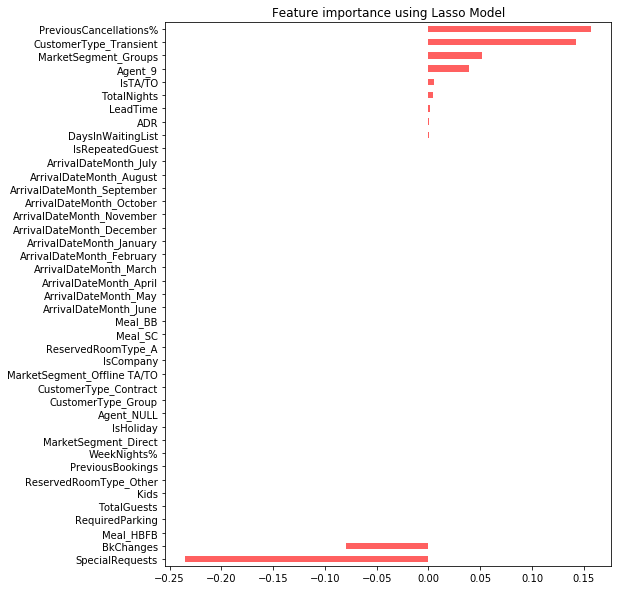

In [98]:
plot_importance(coef, 'Lasso')

Similarly to RFE, this model also returned the top 10 features to include in the model. They are:
* SpecialRequests
* BkChanges
* DaysInWaitingList
* ADR
* LeadTime
* TotalNights
* IsTA/TO
* Agent_9
* MarketSegment_Groups
* CustomerType_Transient
* PreviousCancellations%

In [99]:
var_lasso = df[['SpecialRequests', 'BkChanges', 'DaysInWaitingList', 'ADR', 'LeadTime', 'TotalNights', 'IsTA/TO',
                'Agent_9', 'MarketSegment_Groups', 'CustomerType_Transient', 'PreviousCancellations%']]



<div class="alert alert-success">
    <h3>3.5 - Ridge Regression</h3>

   
</div> 

In [100]:
ridge = RidgeCV()

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 0, stratify = target)

ridge.fit(X=X_train, y=y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [101]:
ridge.alpha_

10.0

In [102]:
ridge.score(X=X_train, y=y_train)

0.3508318500136858

In [103]:
coef_ridge = pd.Series(ridge.coef_, index=X_train.columns)
coef_ridge.sort_values()

SpecialRequests               -0.282762
RequiredParking               -0.250649
BkChanges                     -0.165997
IsCompany                     -0.101160
MarketSegment_Direct          -0.091703
ArrivalDateMonth_July         -0.049548
ArrivalDateMonth_September    -0.035947
IsTA/TO                       -0.024261
IsRepeatedGuest               -0.022485
ArrivalDateMonth_August       -0.019212
IsHoliday                     -0.012707
Meal_HBFB                     -0.009199
ArrivalDateMonth_March        -0.008723
ArrivalDateMonth_November     -0.008324
TotalGuests                   -0.007310
ArrivalDateMonth_October      -0.000893
DaysInWaitingList              0.000240
PreviousBookings               0.000444
ArrivalDateMonth_May           0.000515
ADR                            0.000893
LeadTime                       0.000902
Meal_BB                        0.000948
Kids                           0.006319
Meal_SC                        0.008250
ArrivalDateMonth_June          0.012089


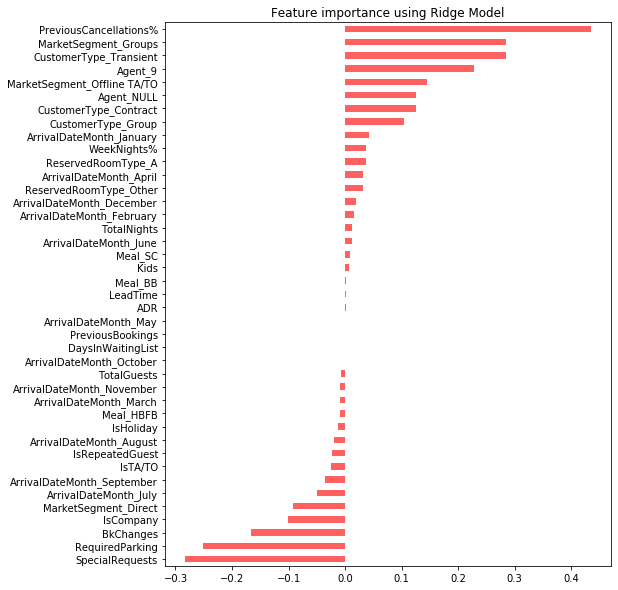

In [104]:
plot_importance(coef_ridge, 'Ridge')

Again, the Ridge regression also returned the best 11 variables to estimate IsCanceled:
* PreviousCancellations%
* MarketSegment_Groups
* CustomerType_Transient
* SpecialRequests
* RequiredParking
* Agent_9
* BkChanges
* MarketSegment_Offline TA/TO
* Agent_NULL
* CustomerType_Contract
* CustomerType_Group

In [105]:
var_ridge = df[['PreviousCancellations%', 'MarketSegment_Groups', 'CustomerType_Transient', 'SpecialRequests', 
                'RequiredParking', 'Agent_9', 'BkChanges', 'MarketSegment_Offline TA/TO', 'Agent_NULL', 
                'CustomerType_Contract', 'CustomerType_Group']]

<div class="alert alert-success">
    <h3>3.6 - Select Final Features</h3>

   
</div> 

In [106]:
var = var_corr.columns
var = var.append(var_rfe.columns)
var = var.append(var_lasso.columns)
var = var.append(var_ridge.columns)

In [107]:
var = pd.DataFrame(var.value_counts(), columns=['Count'])
var

,Count
SpecialRequests,4
CustomerType_Transient,4
PreviousCancellations%,4
BkChanges,4
MarketSegment_Groups,4
RequiredParking,3
Agent_9,3
LeadTime,2
CustomerType_Contract,2
IsTA/TO,2


In the table above, it is possible to see what variables were chosen the most times, by the different algorithms. After analysing it, it was decided to keep all of those who appear in more than one. That led to keeping the following variables to estimate the number of cancellations:
* BkChanges
* CustomerType_Transient
* MarketSegment_Groups
* PreviousCancellations%
* SpecialRequests
* Agent_9
* RequiredParking
* CustomerType_Contract
* IsTA/TO
* LeadTime
* MarketSegment_Offline TA/TO

In [108]:
df_model = df[['IsCanceled', 'BkChanges', 'CustomerType_Transient', 'MarketSegment_Groups', 'PreviousCancellations%',
               'SpecialRequests', 'Agent_9', 'RequiredParking', 'CustomerType_Contract', 'IsTA/TO', 'LeadTime',
               'MarketSegment_Offline TA/TO']]

#df_model.head()

In [109]:
data = df_model.iloc[:,1:]
target = df_model.iloc[:,0]

<br>
<br>
<div class="alert alert-info">
    <br>
    <h2>4 - Predictive Models</h2>
   

</div>


<div class="alert alert-success">
    <h3>4.1 - Logistic Regression</h3>
</div> 


<div class="alert alert-success">
    <h4>4.1.1 - Scaling</h4>
</div> 

In [110]:
X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size = 0.3,
                                                    random_state = 0,
                                                    stratify = target,
                                                    shuffle = True)


<div class="alert alert-success">
    <h5>4.1.1.1 - Raw Data</h5>
</div> 

In [111]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
s_raw = log_model.score(X_test, y_test)
s_raw

0.7846030269721823

<div class="alert alert-success">
    <h5>3.1.1.2 - Standard Scaler</h5>
</div> 

In [113]:
scaler = StandardScaler().fit(X_train)

scaler_X_train = scaler.transform(X_train)
scaler_X_test = scaler.transform(X_test)

In [114]:
model_scaler = LogisticRegression().fit(scaler_X_train, y_train)
s_standard = model_scaler.score(scaler_X_test, y_test)
s_standard

0.7848144077111694

<div class="alert alert-success">
    <h5>4.1.1.3 - Min Max [0,1]</h5>
</div> 

In [115]:
min_max1 = MinMaxScaler().fit(X_train)

min_max1_X_train = min_max1.transform(X_train)
min_max1_X_test = min_max1.transform(X_test)

model_min_max1 = LogisticRegression().fit(min_max1_X_train, y_train)
s_mm1 = model_min_max1.score(min_max1_X_test, y_test)
s_mm1

0.784983512302359

<div class="alert alert-success">
    <h5>4.1.1.4 - Min Max [-1,1]</h5>
</div> 

In [116]:
min_max2 = MinMaxScaler(feature_range=(-1,1)).fit(X_train)

min_max2_X_train = min_max2.transform(X_train)
min_max2_X_test = min_max2.transform(X_test)

model_min_max2 = LogisticRegression().fit(min_max2_X_train, y_train)
s_mm2 = model_min_max2.score(min_max2_X_test, y_test)
s_mm2

0.784772131563372

<div class="alert alert-success">
    <h5>4.1.1.5 - Robust Scaler</h5>
</div> 

In [117]:
robust = RobustScaler().fit(X_train)

robust_X_train = robust.transform(X_train)
robust_X_test = robust.transform(X_test)

model_robust = LogisticRegression().fit(robust_X_train, y_train)
s_robust = model_robust.score(robust_X_test, y_test)
s_robust

0.7846030269721823

<div class="alert alert-success">
    <h5>4.1.1.6 - Choose Best Scaling Method</h5>
</div> 

In [118]:
index = [['Raw Data', 'Standard Scaler', 'MinMax[0,1]', 'MinMax[-1,1]', 'Robust Scaler']]

score = []
score = pd.DataFrame(score + [s_raw] + [s_standard] + [s_mm1] + [s_mm2] + [s_robust], columns=['Score']).set_index(index)

In [119]:
score.sort_values('Score', ascending=False)

,Score
"MinMax[0,1]",0.784984
Standard Scaler,0.784814
"MinMax[-1,1]",0.784772
Raw Data,0.784603
Robust Scaler,0.784603


The best scalling method is the MinMax[0,1].

<div class="alert alert-success">
    <h4>4.1.2 - Build Model</h4>
</div> 

In [120]:
X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size = 0.3,
                                                    random_state = 0,
                                                    stratify = target,
                                                    shuffle = True)

In [121]:
minmax = MinMaxScaler().fit(X_train)

log_X_train = minmax.transform(X_train)
log_X_test = minmax.transform(X_test)

model_log = LogisticRegression().fit(log_X_train, y_train)

In [122]:
y_pred = model_log.predict(log_X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [165]:
pred_prob = model_log.predict_proba(log_X_test)
pred_prob

array([[0.99790265, 0.00209735],
       [0.39101536, 0.60898464],
       [0.08816046, 0.91183954],
       ...,
       [0.90052121, 0.09947879],
       [0.34067846, 0.65932154],
       [0.41809272, 0.58190728]])

In [124]:
model_log.coef_

array([[-1.08320275,  1.88629392,  1.99397934,  5.54224356, -1.5914804 ,
         1.43507333, -4.99511039,  0.98435632,  0.07924635,  3.37071547,
         0.87526636]])

<div class="alert alert-success">
    <h4>4.1.3 - Evaluate Model</h4>
</div> 


In [125]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[11837,  1923],
       [ 3163,  6731]], dtype=int64)

In [126]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.784983512302359

In [127]:
#Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7777906170556967

In [128]:
#Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.680311299777643

In [129]:
#F1score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.7257925382790598

<div class="alert alert-success">
    <h3>4.2 - Neural Networks</h3>
</div> 


<div class="alert alert-success">
    <h4> 4.2.1 - Scaling</h4>
</div> 

In [144]:
X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size = 0.3,
                                                    random_state = 0,
                                                    stratify = target,
                                                    shuffle = True)

<div class="alert alert-success">
    <h5>4.2.1.1 - Raw Data</h5>
</div> 

In [145]:
clf = MLPClassifier().fit(X_train, y_train)
sc_raw = clf.score(X_test, y_test)
sc_raw

0.7982159465629491


<div class="alert alert-success">
    <h5>4.2.1.2 Standard Scaler</h5>
</div> 


In [146]:
scaler = StandardScaler().fit(X_train)

scaler_X_train = scaler.transform(X_train)
scaler_X_test = scaler.transform(X_test)

model_scaler = MLPClassifier().fit(scaler_X_train, y_train)
sc_standard = model_scaler.score(scaler_X_test, y_test)
sc_standard

0.8005834108396043


<div class="alert alert-success">
    <h5>4.2.1.3 - Min Max [0,1]</h5>
</div> 

In [147]:
min_max1 = MinMaxScaler().fit(X_train)

min_max1_X_train = min_max1.transform(X_train)
min_max1_X_test = min_max1.transform(X_test)

model_min_max1 = MLPClassifier().fit(min_max1_X_train, y_train)
sc_mm1 = model_min_max1.score(min_max1_X_test, y_test)
sc_mm1

0.8020207998647163



<div class="alert alert-success">
    <h5>5.2.1.4 - Min Max [-1,1]</h5>
</div> 

In [148]:
min_max2 = MinMaxScaler(feature_range=(-1,1)).fit(X_train)

min_max2_X_train = min_max2.transform(X_train)
min_max2_X_test = min_max2.transform(X_test)

model_min_max2 = MLPClassifier().fit(min_max2_X_train, y_train)
sc_mm2 = model_min_max2.score(min_max2_X_test, y_test)
sc_mm2

0.7996110594402638



<div class="alert alert-success">
    <h5>5.2.1.5 - Robust Scaler</h5>
</div> 

In [149]:
robust = RobustScaler().fit(X_train)

robust_X_train = min_max2.transform(X_train)
robust_X_test = min_max2.transform(X_test)

model_robust = MLPClassifier().fit(robust_X_train, y_train)
sc_robust = model_robust.score(robust_X_test, y_test)
sc_robust

0.8019362475691215



<div class="alert alert-success">
    <h5>5.2.1.6 - Choose Best Scaling Method</h5>
</div> 


In [150]:
index = [['Raw Data', 'Standard Scaler', 'MinMax[0,1]', 'MinMax[-1,1]', 'Robust Scaler']]

scores = []
scores = pd.DataFrame(scores + [sc_raw] + [sc_standard] + [sc_mm1] + [sc_mm2] + [sc_robust],
                      columns=['Score']).set_index(index)

In [178]:
scores = round(scores, 3)
scores.sort_values('Score', ascending=False)

,Score
"MinMax[0,1]",0.802
Robust Scaler,0.802
Standard Scaler,0.801
"MinMax[-1,1]",0.800
Raw Data,0.798


Since the Neural Networks are random, everytime the algorithm is ran it presents different values. However, these values are not that much different from eachother. After several runs, the scaling method that presented itself as the best more often was the Robust Scaler and that is why it was decided to use that scaler. 

In this run, the best scaling method is MinMax[0,1].



<div class="alert alert-success">
    <h4>4.2.2 - Build Model</h4>
</div> 


In [179]:
nn_X_train = robust_X_train
nn_X_test = robust_X_test

model_nn = model_robust
#model_nn.score(nn_X_test, y_test)

0.8019362475691215

In [180]:
# Weights between input and hidden layers
model_nn.coefs_[0]

array([[-0.01901274, -0.39556157,  0.00102614, ..., -0.07382851,
        -0.33602451, -0.26724039],
       [-0.48977629,  0.03112414,  0.31633668, ..., -0.4026716 ,
         0.22943796,  0.13378869],
       [-0.0597362 ,  0.32664855, -0.09401409, ..., -0.22677416,
         0.20999848,  0.55056918],
       ...,
       [ 0.10951578, -0.06586892,  0.12536026, ...,  0.24886414,
         0.01605097,  0.11554696],
       [-0.03156965,  0.20068355,  0.588478  , ..., -0.10282563,
         0.39969659,  0.6846077 ],
       [-0.12340905,  0.37309516, -0.01363419, ..., -0.00302431,
        -0.04888466,  0.24928239]])

In [181]:
# Weights between hidden layers and output
model_nn.coefs_[1]

array([[-1.78104713e-001],
       [ 4.35189688e-001],
       [-6.90459205e-002],
       [-4.11657802e-003],
       [ 2.73026999e-001],
       [ 1.05297722e+000],
       [ 4.00069041e-001],
       [-1.19140252e-001],
       [-2.23101604e-001],
       [-3.10899671e+000],
       [ 3.82022773e-002],
       [ 2.31689412e-001],
       [-1.74989950e-001],
       [-7.70798071e-001],
       [ 5.36165889e-001],
       [ 8.70112041e-001],
       [ 7.57193104e-002],
       [ 1.90674714e-002],
       [ 2.72250589e-001],
       [ 5.38323591e-001],
       [ 1.21527558e-001],
       [ 6.42984280e-001],
       [ 3.79720625e-001],
       [ 2.90078578e-001],
       [ 1.24755452e-002],
       [-2.43395239e-001],
       [-8.18016541e-001],
       [-1.06981063e-001],
       [-9.99497082e-001],
       [ 2.86355069e-002],
       [ 1.03651171e-001],
       [ 2.91956347e-002],
       [ 1.65839085e+000],
       [-3.92965781e-001],
       [-2.16011790e-001],
       [-3.10984260e-002],
       [ 1.49208396e+000],
 

In [182]:
model_nn.intercepts_

[array([ 0.21106775, -0.13586836, -0.20264331, -0.00696918, -0.11808873,
        -0.17355061, -0.08238073,  0.16404819, -0.22711062, -0.05540809,
        -0.06511697, -0.11919762,  0.05126314,  0.22534254, -0.15434936,
         0.07264501,  0.0597649 ,  0.04976256, -0.08692907,  0.10741519,
         0.1341307 ,  0.12762429,  0.03588442,  0.15374771, -0.06917303,
        -0.0287031 ,  0.0620192 ,  0.07455677, -0.10410144,  0.1132585 ,
        -0.05376489, -0.24532856,  0.14204301,  0.03629047,  0.12835534,
         0.16113932, -0.00733354,  0.10459616,  0.04373559, -0.23653212,
         0.11032034, -0.14474472, -0.05065538, -0.04157916, -0.03382228,
        -0.05424414, -0.20286813,  0.06662247,  0.07511337, -0.04037903,
         0.13285281,  0.14560353, -0.18772171, -0.30245659, -0.14139243,
         0.04951667, -0.00679957, -0.02370548, -0.02786697,  0.17639016,
         0.00609546,  0.16440644, -0.08893757,  0.00529366,  0.25772745,
        -0.18228542,  0.15701284,  0.02700555, -0.2

In [183]:
labels_train = model_nn.predict(nn_X_train)
labels_test = model_nn.predict(nn_X_test)

In [184]:
nn_probs = model_nn.predict_proba(nn_X_test)
#nn_probs

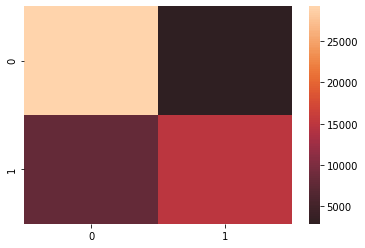

In [185]:
cm = confusion_matrix(y_train, labels_train)
sns.heatmap(cm, center=True)
plt.show() #Good results, most of them in the main diagonal


<div class="alert alert-success">
    <h4>5.2.3 - Evaluate Model</h4>
</div> 


In [186]:
def metrics(y_train, pred_train , y_test, pred_test):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                     TEST                                                  ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_test, pred_test))
    print(confusion_matrix(y_test, pred_test))

In [187]:
metrics(y_train, labels_train, y_test, labels_test)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.91      0.84     32106
           1       0.84      0.65      0.73     23086

    accuracy                           0.80     55192
   macro avg       0.81      0.78      0.79     55192
weighted avg       0.81      0.80      0.80     55192

[[29216  2890]
 [ 8117 14969]]
___________________________________________________________________________________________________________
                                                     TEST                                                  
------------------------------------------------------------------------------------------------------

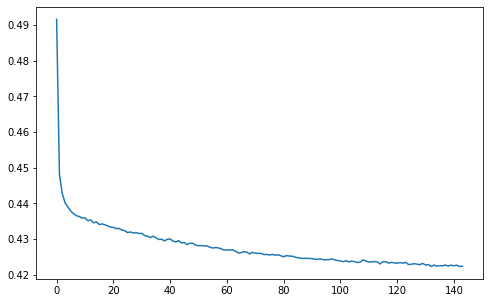

In [188]:
losses = model_nn.loss_curve_
iterations = range(model_nn.n_iter_)

fig = plt.figure(figsize=(8, 5))
sns.lineplot(iterations, losses)


<div class="alert alert-success">
    <h3>5.3 - Compare Models</h3>
</div> 

Neural Network: ROC AUC=0.866
Logistic Regression: ROC AUC=0.845


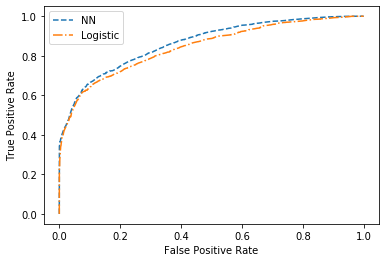

In [189]:
# keep probabilities for the positive outcome only
pred_prob_1 = pred_prob[:, 1]
nn_probs_1 = nn_probs[:, 1]

# calculate scores
nn_auc = roc_auc_score(y_test, nn_probs_1)
lr_auc = roc_auc_score(y_test, pred_prob_1)

# summarize scores
print('Neural Network: ROC AUC=%.3f' % (nn_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs_1)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred_prob_1)

# plot the roc curve for the model
plt.plot(nn_fpr, nn_tpr, linestyle='--', label='NN')
plt.plot(lr_fpr, lr_tpr, linestyle='-.', label='Logistic') #marker='.'

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()